**Question 3: Differentiating Top-Performing Teams from Lower-Performing Ones
Datasets: Look for datasets with comprehensive team performance metrics (points scored, points allowed, win-loss records, shooting percentages, etc.) over multiple seasons.
Preparation: Classify teams as top-performing or lower-performing based on their win-loss record, playoff appearances.
Analysis: Use Gradient Boosting to identify which statistics are most predictive of a team's classification.
Interpretation: Determine the key differentiators that set top-performing teams apart. (can limit it to teams that will enter playoffs, enter semi finals in playoffs, or end up with top whatever record). Can do it for one year, or across multiple years.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/nba_team_stats_00_to_21 (1).csv")

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

df = df.dropna()

df['top_performing'] = df['WIN%'].apply(lambda x: 1 if x > 0.6 else 0)

ndf1 = df.drop(['teamstatspk', 'TEAM', 'SEASON', 'WIN%', 'FGM', '3PM', 'FTM', 'FGA', 'FTA', '3PA'], axis=1)

# Separate the target variable from the predictors
X = ndf1.drop('top_performing', axis=1)
y = ndf1['top_performing']

# Perform feature selection
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Perform cross-validation
cv_scores = cross_val_score(model, X_new, y, cv=5)
print(f'CV Accuracy: {np.mean(cv_scores) * 100:.2f}%')

Test Accuracy: 100.00%
CV Accuracy: 97.93%


In [ ]:
df = df.dropna()

# Classify teams with a regular season win percentage of 60% or higher as "top-performing teams"
df['top_performing'] = df['WIN%'].apply(lambda x: 1 if x >= 0.6 else 0)

# Select features (X) and target variable (y)
X = df[['PTS', 'REB', 'AST', 'OREB', 'DREB', 'FGA', '3PA', 'FTA', 'FG%', '3P%', 'FT%', 'BLK', 'PF', 'TOV', 'STL']]
y = df['top_performing']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8412698412698413
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        87
           1       0.77      0.69      0.73        39

    accuracy                           0.84       126
   macro avg       0.82      0.80      0.81       126
weighted avg       0.84      0.84      0.84       126



In [ ]:
# Extract feature importance
feature_importance = clf.feature_importances_

# Map feature importance to feature names
feature_names = list(X.columns)
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print or visualize feature importance
print(feature_importance)

[0.01353372 0.11911533 0.01409975 0.01881446 0.02305309 0.12252564
 0.04348081 0.02306024 0.277013   0.10355005 0.02191609 0.06832469
 0.04210436 0.06897235 0.04043642]


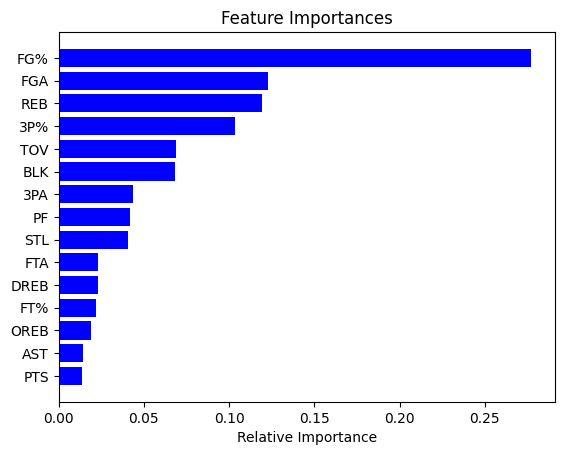

In [ ]:
import matplotlib.pyplot as plt
indices = np.argsort(feature_importance)

plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
# Initialize the Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Initialize RFE with the classifier and the number of features to retain
num_features_to_select = 5  # You can adjust this based on your needs
rfe = RFE(clf, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = pd.DataFrame({'Feature': X_train.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})

# Display the selected features
print("Selected Features:")
print(selected_features[selected_features['Selected']])

# Transform the training set to include only the selected features
X_train_selected = rfe.transform(X_train)

# Transform the testing set as well
X_test_selected = rfe.transform(X_test)

Selected Features:
   Feature  Selected  Ranking
1      REB      True        1
5      FGA      True        1
8      FG%      True        1
9      3P%      True        1
13     TOV      True        1


**Five most important statistics for predicting whether a team is top-performing (in order)**



1.   Field Goal % (FG%)
2.   Three Point % (3P%)
3.   Rebounding (REB)
4.   Turnovers (TOV)
5.   Steals (STL)

